In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
input_dir = '/kaggle/input/nlp-getting-started/train.csv'
test_dir = '/kaggle/input/nlp-getting-started/test.csv'
df = pd.read_csv(input_dir)
test_df = pd.read_csv(test_dir)
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Data Insights

In [60]:
total_length = len(df)
keyword_nans = np.sum(df['keyword'].isna())
location_nans = np.sum(df['location'].isna())
print(f"Total number of rows: {total_length}")
print(f"Total number of keyword NaNs: {keyword_nans}")
print(f"Total number of location NaNs: {location_nans}")

Total number of rows: 7613
Total number of keyword NaNs: 61
Total number of location NaNs: 2533


In [61]:
print(f"Unique Keywords - {df['keyword'].unique()}")
print(f"Unique Locations - {df['location'].unique()}")

Unique Keywords - [nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' 

In [62]:
print(f"Number of Unique keywords - {len(df['keyword'].unique())}")
print(f"Number of Unique Locations - {len(df['location'].unique())}")

Number of Unique keywords - 222
Number of Unique Locations - 3342


In [63]:
keyword_counts = dict(df['keyword'].value_counts())
tup = [(k,v) for k,v in keyword_counts.items()]
zipped_list = list(zip(*tup))

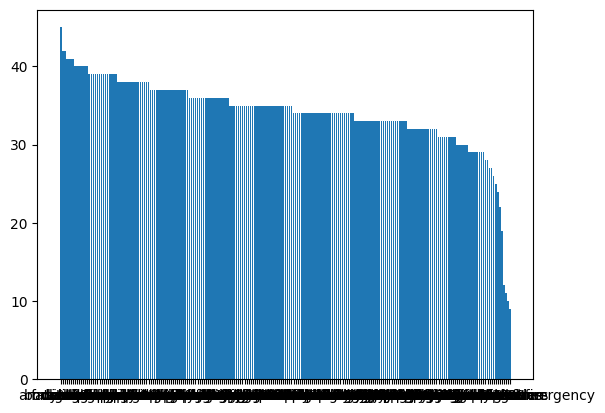

In [64]:
plt.bar(zipped_list[0], zipped_list[1])
plt.show()

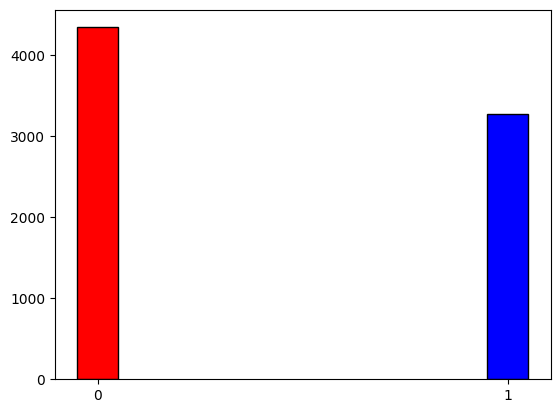

In [65]:
target_counts = dict(df['target'].astype(str).value_counts())
tup = [(k,v) for k,v in target_counts.items()]
zipped_list = list(zip(*tup))
plt.bar(zipped_list[0], zipped_list[1], width=0.1, color=['red', 'blue'], edgecolor='black')
plt.show()

In [66]:
df['textLength'] = df['text'].apply(lambda x: len(str(x).split(' ')))
df.head()

,id,keyword,location,text,target,textLength
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17


## Using data to create dataset

In [67]:
import random
train_valid_split = 0.9
def create_train_valid_split(df):
    """Creates train valid split such that the class distribution is same as original
       df is the dataframe from which train_idx are being calculated
       Splits the dataframe into two dataframe, one for train and other for valid
    """
    z = {}
    train_idx = {}
    valid_idx = {}
    for i in range(0,2):
        z[i] = list(df[df['target'] == i].index) # Creating list of indices that correspond to this class
        random.shuffle(z[i]) # Shuffle the list in place
        split_idx = int(len(z[i])*train_valid_split)
        train_idx[i] = z[i][0:split_idx]
        valid_idx[i] = z[i][split_idx:]
    
    train_df = pd.concat([df.loc[train_idx[i]] for i in range(0,2)], axis=0)
    valid_df = pd.concat([df.loc[valid_idx[i]] for i in range(0,2)], axis=0)
    return train_df, valid_df

train_df, valid_df = create_train_valid_split(df)
train_df = train_df.sample(frac=1, random_state=42)  # Use random_state for reproducibility
train_df.reset_index(drop=True, inplace=True)
valid_df.reset_index(drop=True, inplace=True)

In [68]:
zero_ratio = len(train_df[train_df['target']==0])/len(valid_df[valid_df['target']==0])
one_ratio = len(train_df[train_df['target']==1])/len(valid_df[valid_df['target']==1])
print(f"train/valid for zero:{zero_ratio}")
print(f"train/valid for one:{one_ratio}")

train/valid for zero:8.9816091954023
train/valid for one:8.972560975609756


In [69]:
train_df.loc[:,'keyword'] = train_df['keyword'].apply(lambda x: ' '.join(str(x).split('%20')))
valid_df['keyword'] = valid_df['keyword'].apply(lambda x: ' '.join(str(x).split('%20')))
print(f"Unique key words in train data:{list(train_df['keyword'].unique())}")
print(f"Unique key words in valid data:{list(valid_df['keyword'].unique())}")

Unique key words in train data:['flood', 'curfew', 'wreckage', 'arson', 'drown', 'quarantined', 'attack', 'twister', 'burning buildings', 'refugees', 'deluge', 'hail', 'explode', 'flames', 'buildings burning', 'annihilation', 'weapon', 'body bagging', 'war zone', 'riot', 'landslide', 'heat wave', 'survived', 'fire', 'weapons', 'emergency services', 'sirens', 'inundated', 'violent storm', 'explosion', 'pandemonium', 'siren', 'rioting', 'fear', 'debris', 'nuclear reactor', 'fatalities', 'blown up', 'screamed', 'avalanche', 'accident', 'cyclone', 'lightning', 'evacuate', 'mass murder', 'fatality', 'thunderstorm', 'devastation', 'blaze', 'snowstorm', 'crush', 'flattened', 'catastrophe', 'tsunami', 'hijack', 'bioterror', 'natural disaster', 'obliteration', 'damage', 'blood', 'typhoon', 'evacuation', 'injuries', 'disaster', 'famine', 'injury', 'chemical emergency', 'bomb', 'aftershock', 'bloody', 'collapsed', 'military', 'drowning', 'casualty', 'terrorism', 'tragedy', 'detonate', 'smoke', 'i

### Creating text2 Columns in train, valid and test

In [70]:
train_df['text2'] = train_df.apply(lambda row: row['text'] if (pd.isna(row['keyword']) or row['keyword'] == 'nan') 
                                   else f"{row['keyword']} keyword in {row['text']}", axis=1)

valid_df['text2'] = valid_df.apply(lambda row: row['text'] if (pd.isna(row['keyword']) or row['keyword'] == 'nan') 
                                   else f"{row['keyword']} keyword in {row['text']}", axis=1)

test_df['text2'] = test_df.apply(lambda row: row['text'] if (pd.isna(row['keyword']) or row['keyword'] == 'nan') 
                                   else f"{row['keyword']} keyword in {row['text']}", axis=1)

In [71]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter

In [72]:
token_list = []
def create_token_list(text):
    for word in text.split(' '):
        token_list.append(word)

_ = train_df['text2'].apply(create_token_list)
token_count = Counter(token_list)
sorted_token_count = token_count.most_common()

## Vocabulary and Dataset Parameters

In [73]:
text_choice = 'text2'
MAX_TOKEN_COUNT = 2000
shuffle_buffer_size = 1000
BATCH_SIZE = 64

## Creating Train Valid and Test Datasets

In [74]:
vectorizer = TextVectorization(max_tokens=MAX_TOKEN_COUNT, ragged=True) # Allow Creating Ragged Tensor
vectorizer.adapt(train_df[text_choice])
train_input = vectorizer(train_df[text_choice])
valid_input = vectorizer(valid_df[text_choice])
test_input = vectorizer(test_df[text_choice])

In [75]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_input, train_df['target']))
train_dataset = (
    train_dataset.shuffle(buffer_size=shuffle_buffer_size) #Shuffling dataset here
    .batch(BATCH_SIZE)  # Batch the dataset
    .map(lambda ragged_feature,y:(ragged_feature.to_tensor(default_value=0),y))
    .prefetch(buffer_size=tf.data.AUTOTUNE)  # Prefetch data
    .cache()  # Cache the dataset in memory
)

valid_dataset = tf.data.Dataset.from_tensor_slices((valid_input, valid_df['target']))
valid_dataset = (
    valid_dataset.batch(BATCH_SIZE)  # Batch the dataset
    .map(lambda ragged_feature,y:(ragged_feature.to_tensor(default_value=0),y))
    .prefetch(buffer_size=tf.data.AUTOTUNE)  # Prefetch data
    .cache()  # Cache the dataset in memory
) # No shuffling here

test_dataset = tf.data.Dataset.from_tensor_slices(test_input)
test_dataset = (
    test_dataset.batch(test_input.shape[0])
    .map(lambda ragged_feature: ragged_feature.to_tensor(default_value=0))
    .prefetch(buffer_size=tf.data.AUTOTUNE)  # Prefetch data
    .cache()  # Cache the dataset in memory
)

In [76]:
# .map(lambda x, y: (x, y), num_parallel_calls=tf.data.AUTOTUNE)

## Using pretrained BERT

In [77]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [78]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') # tokenizer for tokenization
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2) # Load model

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## PreTrained BERT training hyperparameters

In [79]:
learning_rate_classifier = 1e-3
learning_rate_bert = 3e-5
num_epochs = 30
patience = 5 #Patience for Training

BATCH_SIZE = 32

### Datasets redefine

In [80]:
# Data generator factory
def data_generator_factory(dataframe, tokenizer, with_target=True):
    def data_generator():
        # Generates tensor using the tokenizer
        for i in range(0, len(dataframe)):
            ret = None
            feature = tokenizer(dataframe.iloc[i][text_choice], return_tensors="tf")
            feature_dict = {k:v[0] for k,v in feature.items()}
            if with_target:
                ret = (feature_dict, dataframe.iloc[i]['target'])
            else:
                ret = feature_dict
            yield ret
    return data_generator


In [81]:
# Define train_dataset
padded_shapes = ({'input_ids':[None], 'token_type_ids':[None], 'attention_mask':[None]}, [])
padding_values = ({'input_ids':0, 'token_type_ids':0, 'attention_mask': 0}, 0)
train_dataset = tf.data.Dataset.from_generator(
    data_generator_factory(train_df, tokenizer),
    output_signature=({
        'input_ids': tf.TensorSpec(shape=(None,), dtype=tf.int32), # None because variable length
        'token_type_ids': tf.TensorSpec(shape=(None,), dtype=tf.int32), # None because variable length
        'attention_mask': tf.TensorSpec(shape=(None,), dtype=tf.int32), # None because variable length
    },
        tf.TensorSpec(shape=(), dtype=tf.int32)   # Label is constant
    )
)

train_dataset = (
    train_dataset.shuffle(buffer_size=shuffle_buffer_size) # Shuffling dataset here
    .padded_batch(batch_size=BATCH_SIZE, padded_shapes=padded_shapes, padding_values=padding_values)  # Batch the dataset
    .prefetch(buffer_size=tf.data.AUTOTUNE)  # Prefetch data
    .cache()  # Cache the dataset in memory
)

In [82]:
# Define valid_dataset
padded_shapes = ({'input_ids':[None], 'token_type_ids':[None], 'attention_mask':[None]}, [])
padding_values = ({'input_ids':0, 'token_type_ids':0, 'attention_mask': 0}, 0)
valid_dataset = tf.data.Dataset.from_generator(
    data_generator_factory(valid_df, tokenizer),
    output_signature=({
        'input_ids': tf.TensorSpec(shape=(None,), dtype=tf.int32), # None because variable length
        'token_type_ids': tf.TensorSpec(shape=(None,), dtype=tf.int32), # None because variable length
        'attention_mask': tf.TensorSpec(shape=(None,), dtype=tf.int32), # None because variable length
    },
        tf.TensorSpec(shape=(), dtype=tf.int32)   # Label is constant
    )
)

valid_dataset = (
    valid_dataset.padded_batch(batch_size=BATCH_SIZE, padded_shapes=padded_shapes, padding_values=padding_values)  # Batch the dataset
    .prefetch(buffer_size=tf.data.AUTOTUNE)  # Prefetch data
    .cache()  # Cache the dataset in memory
)

In [92]:
# Define test_dataset
padded_shapes = {'input_ids':[None], 'token_type_ids':[None], 'attention_mask':[None]}
padding_values = {'input_ids':0, 'token_type_ids':0, 'attention_mask': 0}
test_dataset = tf.data.Dataset.from_generator(
    data_generator_factory(test_df, tokenizer, with_target=False),
    output_signature={
        'input_ids': tf.TensorSpec(shape=(None,), dtype=tf.int32), # None because variable length
        'token_type_ids': tf.TensorSpec(shape=(None,), dtype=tf.int32), # None because variable length
        'attention_mask': tf.TensorSpec(shape=(None,), dtype=tf.int32), # None because variable length
    }
)

test_dataset = (
    test_dataset.padded_batch(batch_size=BATCH_SIZE, padded_shapes=padded_shapes, padding_values=padding_values)  # Batch the dataset
    .prefetch(buffer_size=tf.data.AUTOTUNE)  # Prefetch data
    .cache()  # Cache the dataset in memory
)

### Defining training step

In [84]:
optimizer_classifier = tf.keras.optimizers.Adam(learning_rate=learning_rate_classifier) # Classifier Optimizer
optimizer_bert = tf.keras.optimizers.Adam(learning_rate=learning_rate_bert) # Bert Optimizer
loss_fn = SparseCategoricalCrossentropy(from_logits=True)

def train_step(model, inputs, labels):
    with tf.GradientTape() as tape:
        outputs = model(**inputs, training=True)
        logits = outputs.logits
        loss = loss_fn(labels, logits)

    # Calculate gradients for the entire model
    gradients = tape.gradient(loss, model.trainable_variables)
    
    bert_model = model.bert
    classification_layer = model.classifier
    
    # Apply gradients to BERT layers
    bert_gradients = gradients[:len(bert_model.trainable_variables)]
    optimizer_bert.apply_gradients(zip(bert_gradients, bert_model.trainable_variables))

    # Apply gradients to classification layer
    classification_gradients = gradients[len(bert_model.trainable_variables):]
    optimizer_classifier.apply_gradients(zip(classification_gradients, classification_layer.trainable_variables))

    return loss

## Training

In [85]:
from tqdm import tqdm  # Importing tqdm for progress bars

best_weights = None
best_val_loss = 1000000
no_improv_epochs = 0
best_epoch = -1
train_batches = (len(train_df)+BATCH_SIZE-1)//BATCH_SIZE
valid_batches = (len(valid_df)+BATCH_SIZE-1)//BATCH_SIZE

# First round of validation(without any training)
total_loss = 0.0
total_acc = 0.0
for feature, label in tqdm(valid_dataset, desc='Validating', unit='batch', total=valid_batches):
    outputs = model(**feature)
    logits = outputs.logits
    loss = loss_fn(label, logits)
    pred = np.argmax(logits, axis=-1)
    acc = (np.sum(pred == label)/label.shape[0])
    total_loss += loss.numpy()
    total_acc += acc
avg_loss = total_loss/valid_batches
avg_acc = total_acc/valid_batches
print(f"Validation Loss initial: {avg_loss}, Validation Accuracy initial: {avg_acc}\n")
best_val_loss = avg_loss
best_weights = model.get_weights()

for epoch in range(num_epochs):
    print(f"Starting epoch: {epoch}")
    total_loss = 0.0
    print("Processing Training batches") 
    for feature, label in tqdm(train_dataset, desc='Training', unit='batch', total=train_batches):
        loss = train_step(model, feature, label)
        total_loss += loss.numpy()
    avg_loss = total_loss/train_batches
    print(f"Training Loss is {avg_loss}\n")
    print("Computing Validation metrics")
    total_loss = 0.0
    total_acc = 0.0
    for feature, label in tqdm(valid_dataset, desc='Validating', unit='batch', total=valid_batches):
        outputs = model(**feature)
        logits = outputs.logits
        loss = loss_fn(label, logits)
        pred = np.argmax(logits, axis=-1)
        acc = (np.sum(pred == label)/label.shape[0])
        total_loss += loss.numpy()
        total_acc += acc
    avg_loss = total_loss/valid_batches
    avg_acc = total_acc/valid_batches
    print(f"Validation Loss is {avg_loss}, Validation Accuracy is {avg_acc}\n")
    if avg_loss < best_val_loss:
        print("Best Model so far")
        best_val_loss = avg_loss
        best_weights = model.get_weights()
        no_improv_epochs = 0
        best_epoch = epoch
    else:
        no_improv_epochs += 1
        print("No Improvement")
    if no_improv_epochs > patience:
        print(f"No Improvement for {patience} epochs. Hence, early stopping.")
        break

model.set_weights(best_weights)

Validating: 100%|██████████| 24/24 [00:08<00:00,  2.96batch/s]


Validation Loss initial: 0.6880646720528603, Validation Accuracy initial: 0.4921875

Starting epoch: 0
Processing Training batches


Training: 100%|██████████| 215/215 [06:21<00:00,  1.78s/batch]


Training Loss is 0.4479627036771109

Computing Validation metrics


Validating: 100%|██████████| 24/24 [00:05<00:00,  4.34batch/s]


Validation Loss is 0.35274164254466694, Validation Accuracy is 0.8483314043209876

Best Model so far
Starting epoch: 1
Processing Training batches


Training: 100%|██████████| 215/215 [05:18<00:00,  1.48s/batch]


Training Loss is 0.3088672533631325

Computing Validation metrics


Validating: 100%|██████████| 24/24 [00:05<00:00,  4.39batch/s]


Validation Loss is 0.3701409927258889, Validation Accuracy is 0.8431230709876543

No Improvement
Starting epoch: 2
Processing Training batches


Training: 100%|██████████| 215/215 [05:19<00:00,  1.49s/batch]


Training Loss is 0.21079188584415026

Computing Validation metrics


Validating: 100%|██████████| 24/24 [00:05<00:00,  4.38batch/s]


Validation Loss is 0.49524015467613935, Validation Accuracy is 0.8261959876543209

No Improvement
Starting epoch: 3
Processing Training batches


Training: 100%|██████████| 215/215 [05:16<00:00,  1.47s/batch]


Training Loss is 0.14262847590238548

Computing Validation metrics


Validating: 100%|██████████| 24/24 [00:05<00:00,  4.30batch/s]


Validation Loss is 0.5778317502699792, Validation Accuracy is 0.8454861111111112

No Improvement
Starting epoch: 4
Processing Training batches


Training: 100%|██████████| 215/215 [05:16<00:00,  1.47s/batch]


Training Loss is 0.10567243147403176

Computing Validation metrics


Validating: 100%|██████████| 24/24 [00:05<00:00,  4.41batch/s]


Validation Loss is 0.6617286286006371, Validation Accuracy is 0.8329475308641975

No Improvement
Starting epoch: 5
Processing Training batches


Training: 100%|██████████| 215/215 [05:17<00:00,  1.48s/batch]


Training Loss is 0.09222769874884465

Computing Validation metrics


Validating: 100%|██████████| 24/24 [00:05<00:00,  4.38batch/s]


Validation Loss is 0.5914649913708369, Validation Accuracy is 0.8157793209876543

No Improvement
Starting epoch: 6
Processing Training batches


Training: 100%|██████████| 215/215 [05:15<00:00,  1.47s/batch]


Training Loss is 0.0677508192683765

Computing Validation metrics


Validating: 100%|██████████| 24/24 [00:05<00:00,  4.44batch/s]


Validation Loss is 0.7515635779903581, Validation Accuracy is 0.8259548611111112

No Improvement
No Improvement for 5 epochs. Hence, early stopping.


In [93]:
model.set_weights(best_weights)
print("Predicting Labels for Test data")
test_batches = (len(test_df)+BATCH_SIZE-1)//BATCH_SIZE
preds = np.array([])
for feature in tqdm(test_dataset, desc='Testing', unit='batch', total=test_batches):
    outputs = model(**feature)
    logits = outputs.logits.numpy()
    pred = np.argmax(logits, axis=-1)
    preds = np.concatenate((preds, pred))

Predicting Labels for Test data


Testing: 100%|██████████| 102/102 [00:32<00:00,  3.12batch/s]


In [98]:
preds = preds.astype(int)

In [100]:
out_dframe = pd.DataFrame({'id': test_df['id'], 'target': preds})
out_dframe.set_index('id', inplace=True)
out_dframe.to_csv('/kaggle/working/BERT_pretrained_predict.csv')